# Rice Leaf Diseases Detection

Rice Leaf Diseases Detection ini merupakan salah satu fitur dari project yang sedang kami buat dalam rangka menyelesaikan tugas capstone project

## Input

### Library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization

### Dataset

In [15]:
train_data = "C:/Users/mahid/Downloads/archive/rice_leaf_diseases"

In [16]:
classes=[]
for file in os.listdir(train_data):
    classes+=[file]
print(classes)
print(len(classes))

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
3


In [24]:
brownspot = [train_data + '/Brown Spot/' + img for img in os.listdir(train_data + '/Brown Spot')[:30]]
Leafsmut = [train_data  + '/Leaf smut/' + img for img in os.listdir(train_data + '/Leaf smut')[:30]]
Bacterialleafblight = [train_data  + '/Bacterial leaf blight/' + img for img in os.listdir(train_data + '/Bacterial leaf blight')[:30]]

#### Brown Spot

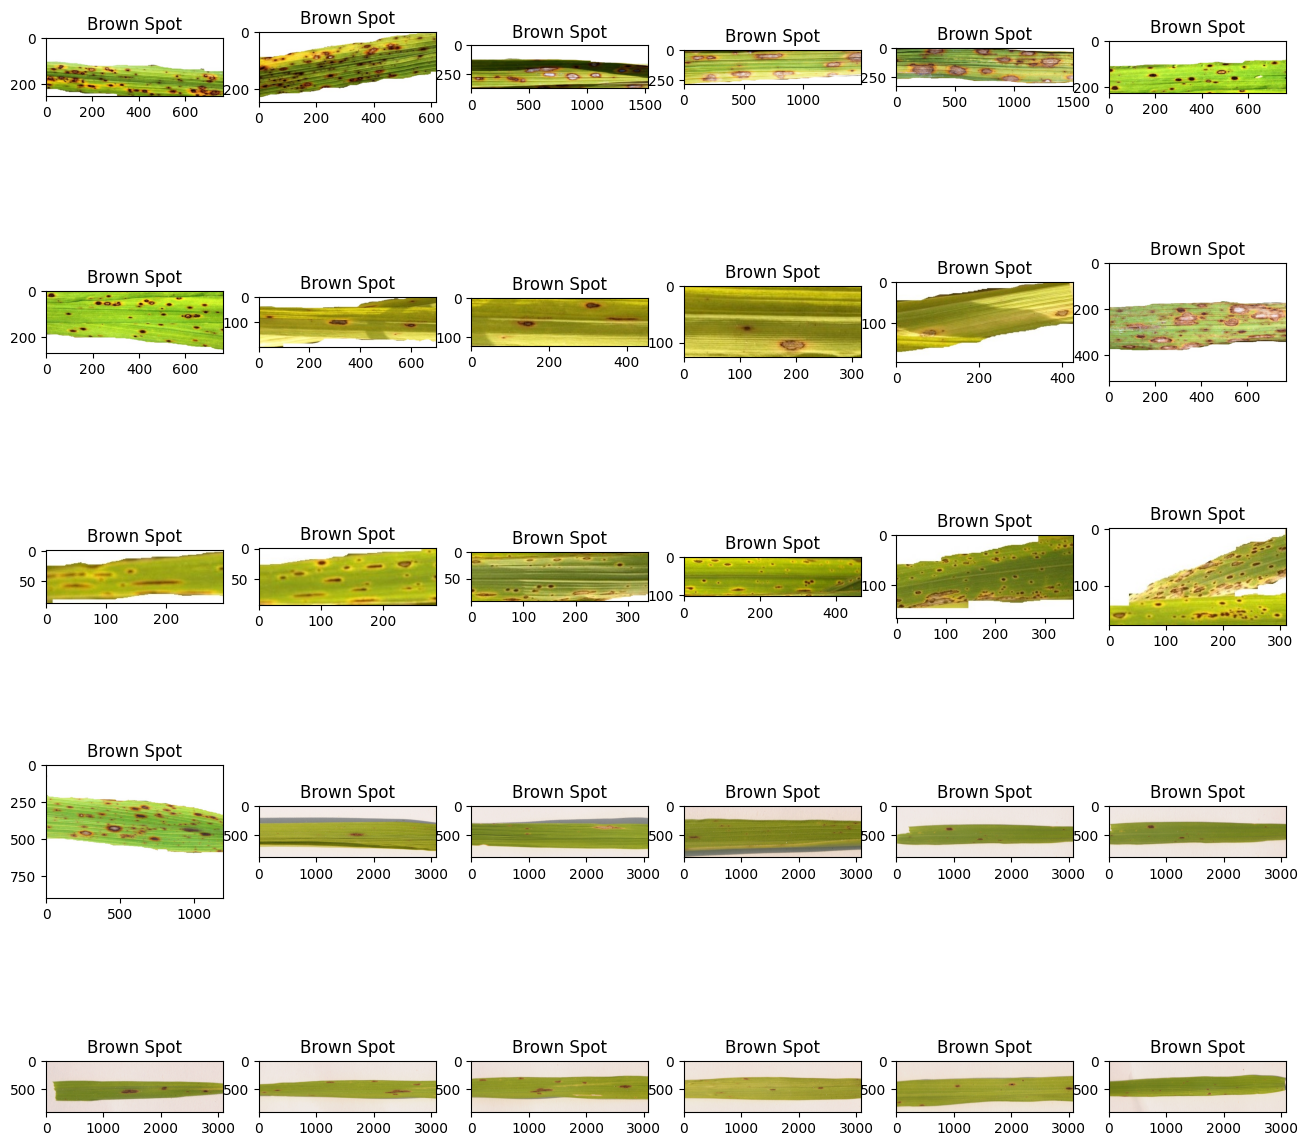

In [26]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(5,6,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

#### Hispa Leaf

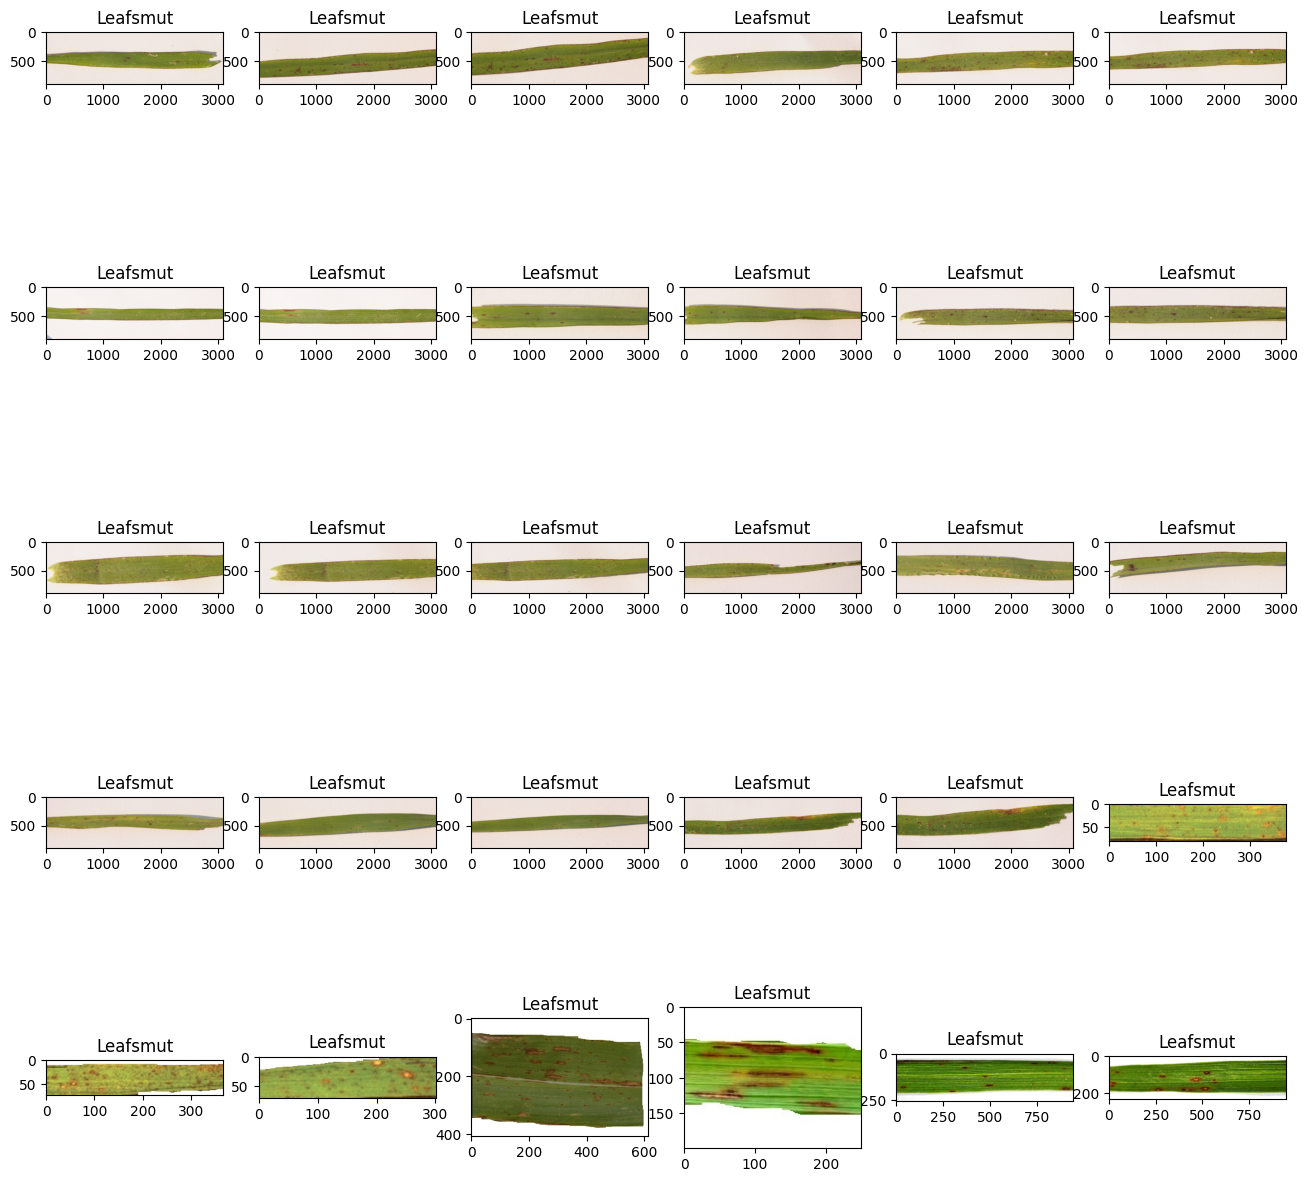

In [27]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(Leafsmut):
    image = Image.open(k)
    plt.subplot(5,6,i+1)
    plt.imshow(image)
    plt.title("Leafsmut")

#### Leaf Blast

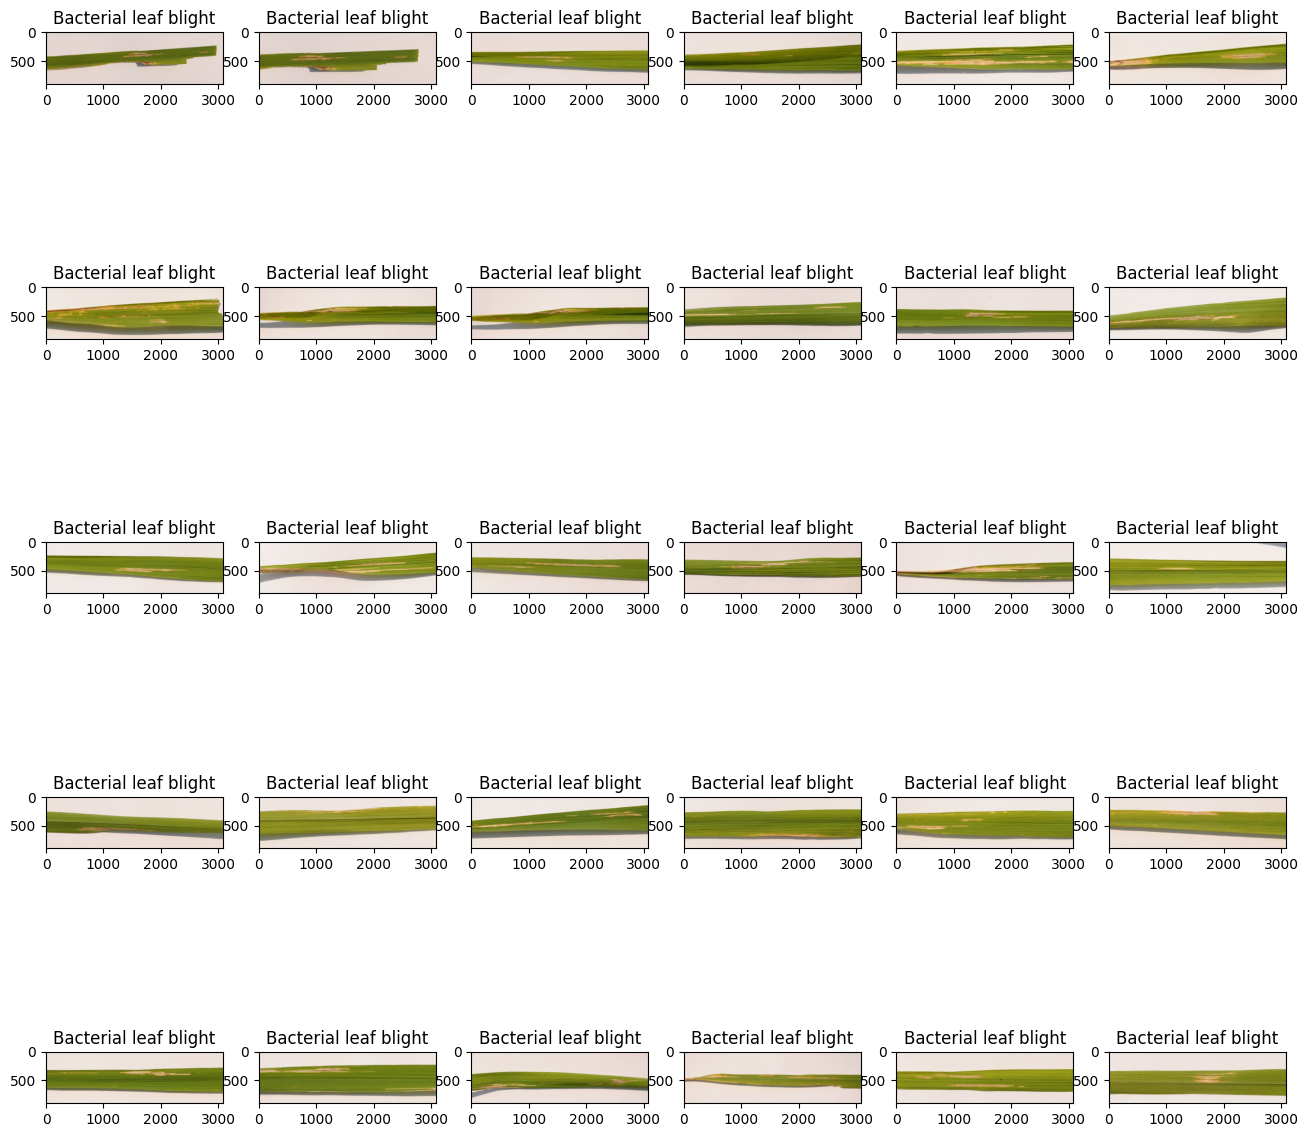

In [28]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(Bacterialleafblight):
    image = Image.open(k)
    plt.subplot(5,6,i+1)
    plt.imshow(image)
    plt.title("Bacterial leaf blight")

In [29]:
dataGenerator = ImageDataGenerator(rescale= 1. / 255)
train_data = dataGenerator.flow_from_directory(
    train_data,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
)

Found 120 images belonging to 3 classes.


## Model

In [30]:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
base_model.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 89s 1us/step


In [31]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ ?                           │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [32]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [39]:
history = model.fit(train_data,epochs=20)

NameError: name 'EPOCHS' is not defined

## Save Model

In [40]:
model.save('./model.h5')
model.save('./model')
model.save('./model.tflite')

ValueError: Unable to synchronously create dataset (name already exists)

## Evaluate

### Loss & Accuracy

In [44]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2) 
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

In [43]:
plot_training_curves(pd.DataFrame(history.history))

NameError: name 'history' is not defined